# Imports

In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

# Load Image

In [2]:
image = mx.image.imread('Mt_Baker.jpg')

In [3]:
print("Type: ",type(image))

Type:  <class 'mxnet.ndarray.ndarray.NDArray'>


In [4]:
print("Shape: ",image.shape)

Shape:  (600, 800, 3)


In [5]:
print("data type: ", image.dtype)

data type:  <class 'numpy.uint8'>


In [6]:
print("Minimum Value: ",image.min().asscalar())
print("Maximum Value: ",image.max().asscalar())

Minimum Value:  0
Maximum Value:  255


# Visualize Image

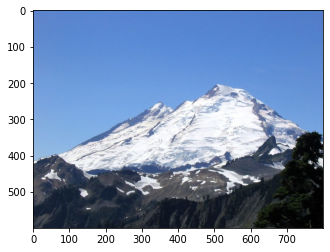

In [7]:
plt.imshow(image.asnumpy())

# Transform and batch Image

In [8]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [9]:
print("shape: ",image.shape)
print("data type: ",image.dtype)
print("Minimum Value: ",image.min().asscalar())
print("Maximum Value: ",image.max().asscalar())

shape:  (1, 3, 224, 224)
data type:  <class 'numpy.float32'>
Minimum Value:  -2.1007793
Maximum Value:  2.64


# Load Model

In [10]:
network = gcv.model_zoo.get_model("ResNet50_v1d",pretrained=True)

# OR

network = gcv.model_zoo.resnet50_v1d(pretrained=True)

# Make Prediction

In [11]:
prediction = network(image)

In [12]:
print(prediction.shape)

(1, 1000)


In [13]:
prediction = prediction[0]

In [14]:
print(prediction.shape)

(1000,)


In [15]:
print("Skipping 950 values...")
print(prediction[950:])

Skipping 950 values...

[ 0.75627685 -0.07888085  0.6047924  -0.14951056  0.17614591 -0.04298797
 -0.25425947  0.44392204  0.82650924  0.06935911 -0.02969606  0.58701324
  0.04561278  0.01121531  0.14850695  0.5957954   0.11737207 -0.03537247
  0.1323147   0.14143758  8.685519    0.25151515  2.9591703   0.10028338
  1.005505    2.7809334   2.9379601   0.4178363   0.9610318   4.666976
  6.2414303  -0.30233938 -0.33414716 -0.4652033   0.0661397   0.70981246
  0.3378495  -0.5509272   0.23563156 -0.18627332  0.521345    0.17234005
 -0.0903929   0.22664094  0.6392718   0.29628575  0.49888608  0.12034744
  0.40953028  0.40122372]
<NDArray 50 @cpu(0)>


# Calculate probability

In [16]:
probability = mx.nd.softmax(prediction)

In [17]:
rounded_probablity = mx.nd.round(probability*100) / 100
print("Skipping 950 values...")
print(rounded_probablity[950:])

Skipping 950 values...

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.73 0.   0.   0.   0.   0.   0.   0.
 0.   0.01 0.06 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 50 @cpu(0)>


In [18]:
mx.nd.softmax(mx.nd.array((-0.5,0.5)))


[0.26894143 0.73105854]
<NDArray 2 @cpu(0)>

In [19]:
mx.nd.softmax(mx.nd.array((-0.5,1.0)))


[0.18242551 0.81757456]
<NDArray 2 @cpu(0)>

In [20]:
mx.nd.softmax(mx.nd.array((-1.0,1.0)))


[0.11920292 0.8807971 ]
<NDArray 2 @cpu(0)>

# Get Top K

In [21]:
k = 5
topk_indicies = mx.nd.topk(probability, k= 5)

In [22]:
topk_indicies


[970. 980. 979. 336. 672.]
<NDArray 5 @cpu(0)>

In [23]:
network.classes[567]

'frying pan'

# Final Answer

In [27]:

print(class_index)
for i in range(k):
    class_index = topk_indicies[i].astype('int').asscalar()
#     print(class_index)
    class_label = network.classes[class_index]
    class_probability = probability[class_index]
    print("#{} {} ({:0.3}%)".format(i+1,class_label,class_probability.asscalar()*100))
    

672
#1 alp (73.4%)
#2 volcano (6.38%)
#3 valley (1.32%)
#4 marmot (0.481%)
#5 mountain tent (0.466%)


# Exit